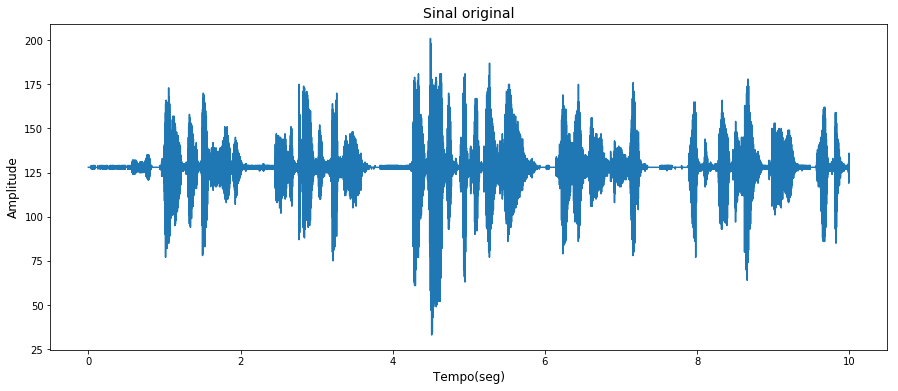

In [50]:
from scipy.signal  import kaiserord, lfilter, firwin, freqz, butter
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

# carregamento do audio
rate, signal = read('audio-sample.wav')

fs = 8000   # frequencia de amostragem do sinal  (Hz)
Ts = 1./fs
n = np.arange(0,signal.size*Ts,Ts)

fig = plt.figure(figsize=(15,6))
plt.title('Sinal original',fontsize=14)
plt.xlabel('Tempo(seg)',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)

plt.plot(n, signal)
plt.show()

In [2]:
write('signal', 8000, signal)

In [3]:
noisy_freq = 2000
num_samples = 80000
sampling_rate = 8000

#Criando o ruído
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/sampling_rate) for x1 in range(num_samples)]

#Convert them to numpy arrays

# sine_wave = np.array(sine_wave)

# sine_noise = np.array(sine_noise)


In [4]:
# Adicionando o ruído ao sinal original

combined_signal = signal + sine_noise

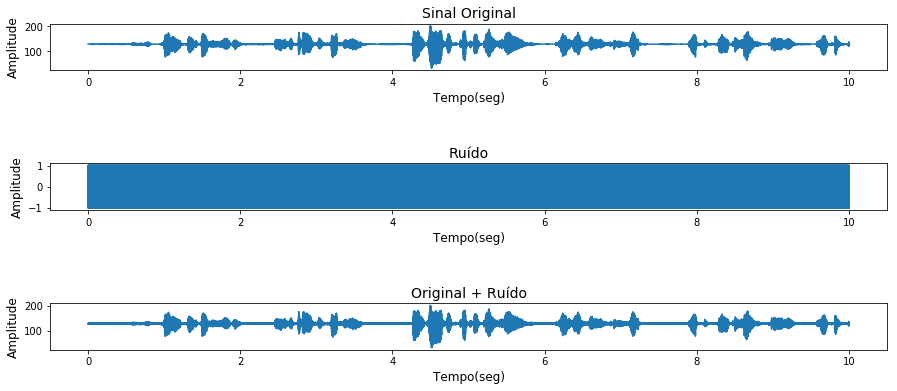

In [5]:
fig = plt.figure(figsize=(15,6))
# Adicionando espacamento
plt.subplots_adjust(hspace=2.)

plt.subplot(3,1,1)
plt.title("Sinal Original",fontsize=14)
plt.xlabel('Tempo(seg)',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)
plt.plot(n, signal)
 
plt.subplot(3,1,2) 
plt.title("Ruído",fontsize=14)
plt.xlabel('Tempo(seg)',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)
plt.plot(n, sine_noise)
 
plt.subplot(3,1,3) 
plt.title("Original + Ruído",fontsize=14)
plt.xlabel('Tempo(seg)',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)
plt.plot(n, combined_signal)
 
plt.show()

# Dando Zoom no sinal

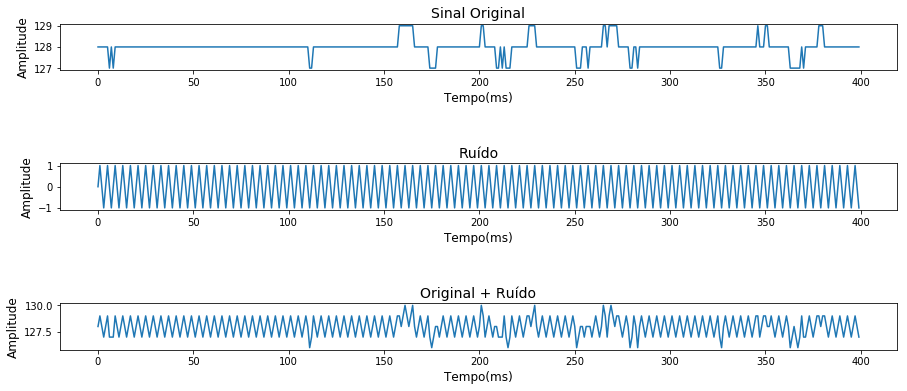

In [6]:
fig = plt.figure(figsize=(15,6))
# Adicionando espacamento
plt.subplots_adjust(hspace=2)

plt.subplot(3,1,1) 
plt.title("Sinal Original",fontsize=14)
plt.xlabel('Tempo(ms)',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)
plt.plot(signal[300:700])
 
plt.subplot(3,1,2) 
plt.title("Ruído",fontsize=14)
plt.xlabel('Tempo(ms)',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)
plt.plot(sine_noise[300:700])
 
plt.subplot(3,1,3) 
plt.title("Original + Ruído",fontsize=14)
plt.xlabel('Tempo(ms)',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)
plt.plot(combined_signal[300:700])
 
plt.show()

In [7]:
write('comb_signal', 8000, combined_signal)

# Filtro

In [26]:
data_fft = np.fft.fft(combined_signal)
 
freq = (np.abs(data_fft[:len(data_fft)]))

In [27]:
freq

array([1.02399540e+07, 4.73200452e+01, 7.75096662e+01, ...,
       1.35575719e+02, 7.75096662e+01, 4.73200452e+01])

(0, 100)

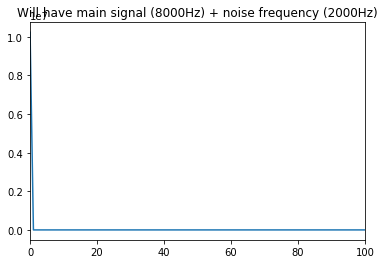

In [24]:
plt.plot(freq)
 
plt.title("Will have main signal (8000Hz) + noise frequency (2000Hz)")
 
plt.xlim(0,100)

In [12]:
# Filtro Passa-baixa

sl = [x for x in range(0, 124, 1)]

for i in range(len(sl)):
    if (sl[i] == 62):
        h = 1.02102 / np.pi
        sl[i] = h
    else:
        numerador = np.sin(0.325 * np.pi * (sl[i] - 62))
        denominador = np.pi * (sl[i] - 62)
        h = (numerador / denominador) * (0.5 - 0.5 * np.cos((2 * np.pi * sl[i] / (124))))
        sl[i] = h

In [28]:
filtered_freq = [f if (7000 < index < 9000 and f > 1) else 0 for index, f in enumerate(freq)]

In [34]:
recovered_signal = np.fft.ifft(filtered_freq)

In [48]:
import matplotlib.pyplot as plt

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

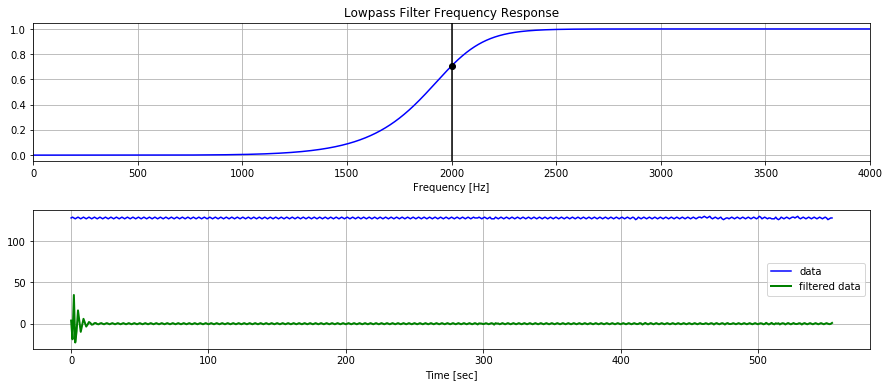

In [47]:
fig = plt.figure(figsize=(15,6))
# Adicionando espacamento
plt.subplots_adjust(hspace=2)

# Filter requirements.
order = 6
fs = 8000       # sample rate, Hz
cutoff = 2000  # desired cutoff frequency of the filter, Hz

b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

y = butter_lowpass_filter(combined_signal, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(combined_signal[:555], 'b-', label='data')
plt.plot(y[:555], 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

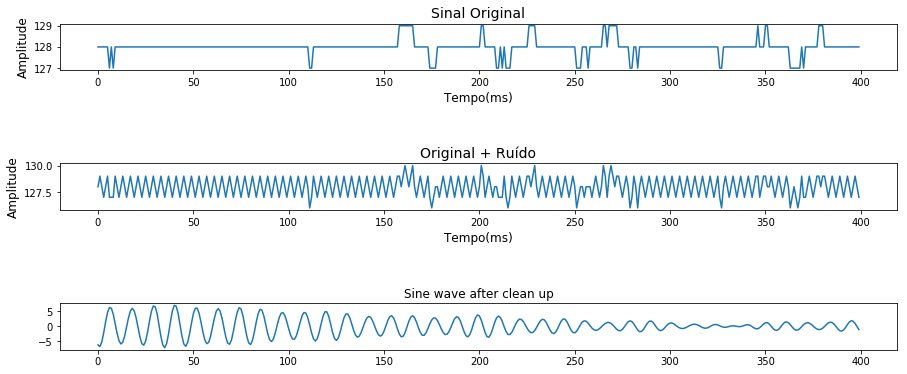

In [30]:
fig = plt.figure(figsize=(15,6))

# Adicionando espacamento
plt.subplots_adjust(hspace=2)

plt.subplot(3,1,1) 
plt.title("Sinal Original",fontsize=14)
plt.xlabel('Tempo(ms)',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)
plt.plot(signal[300:700])
 
plt.subplot(3,1,2) 
plt.title("Original + Ruído",fontsize=14)
plt.xlabel('Tempo(ms)',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)
plt.plot(combined_signal[300:700])
 
plt.subplot(3,1,3)
plt.title("Sine wave after clean up")
plt.plot((recovered_signal[300:700]))
 
plt.show()

In [41]:
write('signal_clean', 8000, y)